In [22]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [23]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

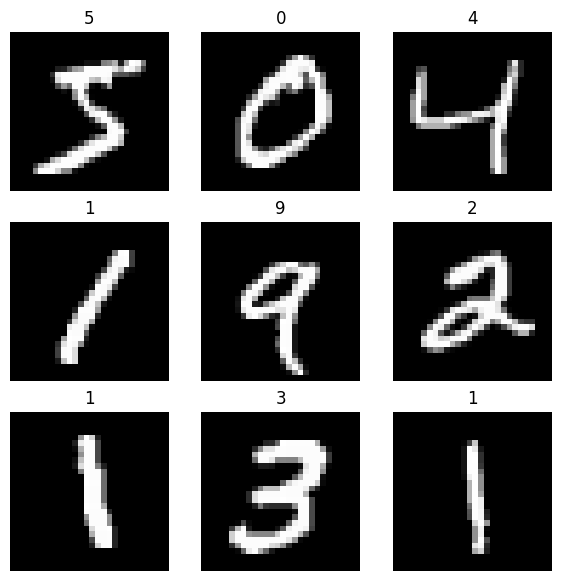

In [24]:
plt.figure(figsize=(7,7))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i],cmap="gray")
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

In [25]:
x_train=np.pad(x_train,((0,0),(10,10),(10,10)))
x_test=np.pad(x_test,((0,0),(10,10),(10,10)))

x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

x_train=np.stack((x_train,)*3,axis=-1)
x_test=np.stack((x_test,)*3,axis=-1)

In [27]:
aug=ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.1
)

In [29]:
aug.fit(x_train)
train_generator=aug.flow(x_train,y_train,batch_size=32)

In [30]:
model=tf.keras.Sequential()
model.add(VGG16(include_top=False,pooling="avg",weights="imagenet",input_shape=(48,48,3)))
model.add(Dense(512,activation="relu"))
model.add(Dense(10,activation="softmax"))

model.layers[0].trainable=False

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14,982,474
Trainable params: 267,786
Non-trainable params: 14,714,688
_________________________________________________________________


In [31]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['acc'])

In [ ]:
model.fit(train_generator,batch_size=32,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 624s 332ms/step - loss: 0.5253 - acc: 0.8328
Epoch 2/10
1875/1875 [==============================] - 807s 430ms/step - loss: 0.3045 - acc: 0.9007
Epoch 3/10
1875/1875 [==============================] - 1731s 923ms/step - loss: 0.2610 - acc: 0.9147
Epoch 4/10
 239/1875 [==>...........................] - ETA: 31:27 - loss: 0.2477 - acc: 0.9170

In [ ]:
history=model.evaluate(x_test,y_test,verbose=0)
acc=history[1]
print("%.2f" %acc,"")